# Telecom Churn Case Study

## Business Problem Overview
##### In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

##### The dataset given contains customer-level information for a span of four consecutive months - June, July, August & September. The months are encoded as 6, 7, 8 and 9, respectively. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Analysis Methodology
##### Load and clean the data: Load the customer data into a Pandas dataframe and clean the data by handling missing values, removing duplicates, and transforming variables as necessary.

##### Exploratory Data Analysis (EDA): Perform EDA on the data to understand the distribution of the variables and identify any trends or patterns that might be relevant to customer churn. You can use visualizations such as histograms, scatter plots, and bar plots to help with this.

##### Feature Engineering: Create new variables or modify existing ones to capture relevant information about the customers, such as their usage patterns, billing information, and customer service interactions.

##### Model Building: Split the data into training and testing sets, and use machine learning algorithms such as logistic regression, decision trees, or random forests to build predictive models to predict customer churn. You can use the scikit-learn library in Python for this step.

##### Model Evaluation: Evaluate the performance of the predictive models by calculating metrics such as accuracy, precision, recall, and F1-score. You can use the metrics library in scikit-learn for this step.

##### Model Tuning: If the performance of the predictive models is not satisfactory, tune the models by adjusting the hyperparameters or trying different algorithms to see if they yield better results.

##### Model Deployment: Once you have a satisfactory model, deploy it in a production environment and use it to predict customer churn for new data.

### Load and clean the data

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
#Importing Dataset
tcc_data = pd.read_csv("telecom_churn_data.csv")

In [4]:
tcc_data.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [5]:
tcc_data.shape

(3972, 226)

In [6]:
tcc_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offnet

In [7]:
#Observing the info above, we can see that the columns with data-time values are dipicted as object. We will be coverting them into data-time format
date_col= tcc_data.select_dtypes(include=['object'])
print(date_col.columns)

for i in date_col.columns:
    tcc_data[i] = pd.to_datetime(tcc_data[i])

# Current dimension of the dataset
tcc_data.shape

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')


(3972, 226)

In [8]:
tcc_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,3.972000e+03,3972.0,3939.0,3939.0,3939.0,3972.000000,3972.000000,3972.000000,3972.000000,3842.000000,3823.000000,3755.000000,3659.000000,3842.000000,3823.000000,3755.000000,3659.000000,3842.000000,3823.000000,3755.000000,3659.000000,3842.000000,3823.000000,3755.000000,3659.000000,3842.000000,3823.000000,3755.000000,3659.000000,3842.000000,3823.000000,3755.000000,3659.000000,3842.000000,3823.000000,3755.000000,3659.000000,3842.000000,3823.000000,3755.000000,3659.000000,3842.000000,3823.000000,3755.000000,3658.000000,3841.000000,3822.000000,3754.000000,3658.000000,3841.000000,3822.000000,3754.000000,3658.000000,3841.000000,3822.000000,3754.000000,3658.000000,3841.0,3822.0,3754.0,3658.0,3841.000000,3822.000000,3754.000000,3658.000000,3841.000000,3822.000000,3754.000000,3658.000000,3841.000000,3822.000000,3754.000000,3658.000000,3841.000000,3822.000000,3754.000000,3658.000000,397

In [9]:
# Eliminating Columns
#In this step we will be removing columns whose values do not affect the overall variance of the model (columns with unique values)

unique_col=[]
for i in tcc_data.columns:
    if tcc_data[i].nunique() == 1:
        unique_col.append(i)
    else:
        pass
    
tcc_data.drop(unique_col, axis=1, inplace = True)
print("\n The following Columns are dropped from the dataset\n",
      unique_col)


 The following Columns are dropped from the dataset
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [10]:
tcc_data.shape

(3972, 210)

In [11]:
#Identifying missing values in the dataset
((tcc_data.isnull().sum()/tcc_data.shape[0])*100).round(2).sort_values(ascending=False)

fb_user_6                   74.60
count_rech_2g_6             74.60
arpu_2g_6                   74.60
arpu_3g_6                   74.60
max_rech_data_6             74.60
av_rech_amt_data_6          74.60
night_pck_user_6            74.60
date_of_last_rech_data_6    74.60
count_rech_3g_6             74.60
total_rech_data_6           74.60
av_rech_amt_data_9          74.07
date_of_last_rech_data_9    74.07
max_rech_data_9             74.07
count_rech_3g_9             74.07
total_rech_data_9           74.07
count_rech_2g_9             74.07
arpu_2g_9                   74.07
night_pck_user_9            74.07
fb_user_9                   74.07
arpu_3g_9                   74.07
date_of_last_rech_data_7    73.36
night_pck_user_7            73.36
max_rech_data_7             73.36
fb_user_7                   73.36
count_rech_2g_7             73.36
arpu_3g_7                   73.36
total_rech_data_7           73.36
count_rech_3g_7             73.36
arpu_2g_7                   73.36
av_rech_amt_da

In [12]:
# Observing pattern in missing values in recharge columns for the month of June
tcc_data[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.0,252.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.0,56.0
5,NaT,NaN,NaN
6,NaT,NaN,NaN
7,NaT,NaN,NaN
8,NaT,NaN,NaN
9,NaT,NaN,NaN


##### Looking at the above table, we observed that when the data of last recharge is not given (the customer has churned or just simply did not recharge their mobile further ) the corresponding data in the columns total_rech_data_6 and max_rech_data_6 is also missing. Hence, we will be imputing 0 as their value 

In [13]:
#Handling missing values for total_rech_data_<month> and max_rech_data_<month> for the months 6,7,8 and 9

start_time=time.time()
for i in range(len(tcc_data)):
  # Handling 'total_rech_data', 'max_rech_data' and for month 6
    if pd.isnull((tcc_data['total_rech_data_6'][i]) and (tcc_data['max_rech_data_6'][i])):
        if pd.isnull(tcc_data['date_of_last_rech_data_6'][i]):
            tcc_data['total_rech_data_6'][i]=0
            tcc_data['max_rech_data_6'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 7
    if pd.isnull((tcc_data['total_rech_data_7'][i]) and (tcc_data['max_rech_data_7'][i])):
        if pd.isnull(tcc_data['date_of_last_rech_data_7'][i]):
            tcc_data['total_rech_data_7'][i]=0
            tcc_data['max_rech_data_7'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 8
    if pd.isnull((tcc_data['total_rech_data_8'][i]) and (tcc_data['max_rech_data_8'][i])):
        if pd.isnull(tcc_data['date_of_last_rech_data_8'][i]):
            tcc_data['total_rech_data_8'][i]=0
            tcc_data['max_rech_data_8'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 9
    if pd.isnull((tcc_data['total_rech_data_9'][i]) and (tcc_data['max_rech_data_9'][i])):
        if pd.isnull(tcc_data['date_of_last_rech_data_9'][i]):
            tcc_data['total_rech_data_9'][i]=0
            tcc_data['max_rech_data_9'][i]=0

end_time = time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds")
print("The following columns are imputed with 0 for missing values:\n'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'\n'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9'")


Execution Time =  7.91 seconds
The following columns are imputed with 0 for missing values:
'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'
'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9'


##### Handling the missing values for the attributes count_rech_2g_*,count_rech_3g_* for month 6,7,8 and 9

In [14]:
# Checking the related columns values
tcc_data[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,1.0,0.0,1.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


#### From the above tablular the column values of total_rech_data for each month from 6 to 9 respectively is the sum of the columns values of count_rech_2g for each month from 6 to 9 respectively and count_rech_3g for each month from 6 to 9 respectively, which derives to a multicollinearity issue. In order to reduce the multicollinearity, we can drop the columns count_rech_2g for each month from 6 to 9 respectively and count_rech_3g for each month from 6 to 9 respectively.

In [15]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
tcc_data.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8',
                   'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)

print("The columns dropped are:'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'")

The columns dropped are:'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'


##### Handling the missing values for the attributes arpu_3g_*,arpu_2g_* for month 6,7,8 and 9

In [16]:
# Checking the related columns values
tcc_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [17]:
# Checking the correlation between the above mentioned columns in tabular for months 6,7,8 and 9
print("Correlation table for month 6\n\n", tcc_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", tcc_data[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", tcc_data[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nCorrelation table for month 9\n\n", tcc_data[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6           1.000000   0.927554   0.725328          
arpu_2g_6           0.927554   1.000000   0.754763          
av_rech_amt_data_6  0.725328   0.754763   1.000000          

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7           1.000000   0.944694   0.831553          
arpu_2g_7           0.944694   1.000000   0.812120          
av_rech_amt_data_7  0.831553   0.812120   1.000000          

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8           1.000000   0.924359   0.749523          
arpu_2g_8           0.924359   1.000000   0.759434          
av_rech_amt_data_8  0.749523   0.759434   1.000000          

Correlation table for month 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9           1.000000   0.948339   0.802623          
arpu_2g_9      

#### From the above correlation table between attributes arpu_2g_* and arpu_3g_* for each month from 6 to 9 respectively is highly correlated to the attribute av_rech_amt_data_* for each month from 6 to 9 respectively.
#### Considering the high correlation between them, it is safer to drop the attributes arpu_2g_* and arpu_3g_*.

In [18]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 datafrom the dataset
tcc_data.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8',
                  'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)
print("\nThe columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset\n")


The columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset



In [19]:
tcc_data.shape

(3972, 194)

#### Handling the other attributes with higher missing value percentage
The column fb_user_* and night_pck_user_* for each month from 6 to 9 respectively has a missing values above 50% and does not seem to add any information to understand the data. Hence we can drop these columns for further analysis.

In [20]:
tcc_data.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],
                  axis=1, inplace=True)
print("\nThe columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' are dropped from the dataset as it has no meaning to the data snd has high missing values above 50%\n")


The columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' are dropped from the dataset as it has no meaning to the data snd has high missing values above 50%



#### Handling the missing values for the attributes av_rech_amt_data_* for month 6,7,8 and 9

In [21]:
# Checking the related columns values
tcc_data[['av_rech_amt_data_7','max_rech_data_7','total_rech_data_7']].head(10)

,av_rech_amt_data_7,max_rech_data_7,total_rech_data_7
0,252.0,252.0,1.0
1,154.0,154.0,1.0
2,NaN,0.0,0.0
3,NaN,0.0,0.0
4,NaN,0.0,0.0
5,NaN,0.0,0.0
6,NaN,0.0,0.0
7,NaN,0.0,0.0
8,177.0,154.0,2.0
9,154.0,154.0,1.0


##### From the above tabular it is deduced that the missing values for the column av_rech_amt_data_* for each month from 6 to 9 can be replaced as 0 if the total_rech_data_* for each month from 6 to 9 respectively is 0. i.e. if the total recharge done is 0 then the average recharge amount shall also be 0.

In [22]:
# Code for conditional imputation
start_time = time.time()
for i in range(len(tcc_data)):
  # Handling `av_rech_amt_data`  for month 6
    if (pd.isnull(tcc_data['av_rech_amt_data_6'][i]) and (tcc_data['total_rech_data_6'][i]==0)):
        tcc_data['av_rech_amt_data_6'][i] = 0

  # Handling `av_rech_amt_data`  for month 7
    if (pd.isnull(tcc_data['av_rech_amt_data_7'][i]) and (tcc_data['total_rech_data_7'][i]==0)):
        tcc_data['av_rech_amt_data_7'][i] = 0

  # Handling `av_rech_amt_data`  for month 8
    if (pd.isnull(tcc_data['av_rech_amt_data_8'][i]) and (tcc_data['total_rech_data_8'][i]==0)):
        tcc_data['av_rech_amt_data_8'][i] = 0

  # Handling `av_rech_amt_data`  for month 9
    if (pd.isnull(tcc_data['av_rech_amt_data_9'][i]) and (tcc_data['total_rech_data_9'][i]==0)):
        tcc_data['av_rech_amt_data_9'][i] = 0


end_time=time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds")
print("\nThe columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' and 'av_rech_amt_data_9' are imputed with 0 based on the condition explained above\n")


Execution Time =  3.51 seconds

The columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' and 'av_rech_amt_data_9' are imputed with 0 based on the condition explained above



In [23]:
# Checking the overall missing values in the dataset
((tcc_data.isnull().sum()/tcc_data.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.60
date_of_last_rech_data_9    74.07
date_of_last_rech_data_7    73.36
date_of_last_rech_data_8    73.24
std_ic_t2t_mou_9            7.91 
spl_ic_mou_9                7.91 
loc_og_mou_9                7.91 
std_og_t2m_mou_9            7.91 
std_og_t2f_mou_9            7.91 
std_og_mou_9                7.91 
std_ic_mou_9                7.91 
isd_og_mou_9                7.91 
spl_og_mou_9                7.91 
isd_ic_mou_9                7.91 
std_ic_t2f_mou_9            7.91 
og_others_9                 7.91 
std_ic_t2m_mou_9            7.91 
loc_ic_t2m_mou_9            7.91 
loc_ic_mou_9                7.91 
loc_ic_t2f_mou_9            7.91 
ic_others_9                 7.91 
std_og_t2t_mou_9            7.91 
loc_ic_t2t_mou_9            7.91 
roam_ic_mou_9               7.88 
loc_og_t2c_mou_9            7.88 
loc_og_t2t_mou_9            7.88 
offnet_mou_9                7.88 
loc_og_t2m_mou_9            7.88 
loc_og_t2f_mou_9            7.88 
roam_og_mou_9 

In [24]:
tcc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(177), int64(1)
memory usage: 5.6 MB


#### From the above results, we can conclude, the date_of_last_rech_data_* corresponding to months 6,7,8 and 9 are of no value after the conditional imputation of of columns total_rech_data_*, max_rech_data_*are completes.
Also the missing value percentage is high for these columns and can be dropped from the dataset.

In [25]:
# Dropping the columns related to datetime dtype from the dataset
tcc_data.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data



#### As we can no more utilise the datetime column, we can drop the date_of_last_rech_data_* column corresponding to months 6,7,8 and 9 respectively.

In [26]:
# Dropping the columns related to datetime dtype from the dataset
tcc_data.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it has no significance to the data



In [27]:
# The curent dimensions of the dataset
tcc_data.shape

(3972, 178)

##### Since the columns used to determine the High Value Customer is clear of null values, we can filter the overall data and then handle the remaining missing values for each column

### Filtering the High Value Customer from Good Phase

In [28]:
# Filtering the data 
 # We are filtering the data in accordance to total revenue generated per customer.

 # first we need the total amount recharge amount done for data alone, we have average rechage amount done. 

 # Calculating the total recharge amount done for data alone in months 6,7,8 and 9
tcc_data['total_rech_amt_data_6']=tcc_data['av_rech_amt_data_6'] * tcc_data['total_rech_data_6']
tcc_data['total_rech_amt_data_7']=tcc_data['av_rech_amt_data_7'] * tcc_data['total_rech_data_7']

# Calculating the overall recharge amount for the months 6,7,8 and 9
tcc_data['overall_rech_amt_6'] = tcc_data['total_rech_amt_data_6'] + tcc_data['total_rech_amt_6']
tcc_data['overall_rech_amt_7'] = tcc_data['total_rech_amt_data_7'] + tcc_data['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
tcc_data['avg_rech_amt_6_7'] = (tcc_data['overall_rech_amt_6'] + tcc_data['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = tcc_data['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value is: ",cut_off,"\n")

# Filtering the data to the top 30% considered as High Value Customer
tcc_data = tcc_data[tcc_data['avg_rech_amt_6_7'] >= cut_off]


The 70th quantile value is:  489.5 



In [29]:
# The curent dimension of the dataset
tcc_data.shape

(1192, 183)

In [30]:
# Let us check the missing values percentages again for the HVC group
    # Checkng the overall missing values in the dataset
((tcc_data.isnull().sum()/tcc_data.shape[0])*100).round(2).sort_values(ascending=False)

loc_ic_t2f_mou_9         6.12
spl_og_mou_9             6.12
loc_og_t2m_mou_9         6.12
loc_og_t2f_mou_9         6.12
loc_ic_t2t_mou_9         6.12
isd_og_mou_9             6.12
loc_og_t2t_mou_9         6.12
loc_ic_t2m_mou_9         6.12
std_og_t2t_mou_9         6.12
roam_og_mou_9            6.12
std_og_mou_9             6.12
loc_ic_mou_9             6.12
std_ic_t2t_mou_9         6.12
roam_ic_mou_9            6.12
loc_og_t2c_mou_9         6.12
std_ic_t2m_mou_9         6.12
offnet_mou_9             6.12
std_ic_t2f_mou_9         6.12
std_og_t2f_mou_9         6.12
std_ic_mou_9             6.12
onnet_mou_9              6.12
spl_ic_mou_9             6.12
loc_og_mou_9             6.12
isd_ic_mou_9             6.12
std_og_t2m_mou_9         6.12
ic_others_9              6.12
og_others_9              6.12
std_og_mou_8             3.78
isd_og_mou_8             3.78
std_og_t2f_mou_8         3.78
std_ic_t2t_mou_8         3.78
og_others_8              3.78
loc_ic_t2t_mou_8         3.78
loc_ic_t2m

##### *** The remaining attributes with missing value can be imputed using the advanced imputation technique like KNNImputer.***

In [31]:
# Numerical columns available
num_col = tcc_data.select_dtypes(include = ['int64','float64']).columns.tolist()

In [32]:
# Importing the libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
tcc_data[num_col]=scalar.fit_transform(tcc_data[num_col])

# Calling the KNN Imputer function
knn=KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer
start_time=time.time()

tcc_data_knn = pd.DataFrame(knn.fit_transform(tcc_data[num_col]))
tcc_data_knn.columns=tcc_data[num_col].columns

end_time=time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds\n")


Execution Time =  0.22 seconds



In [33]:
# check for any null values after imputation for numerical columns
tcc_data_knn.isnull().sum().sum()

0

#### The KNN Imputer has replaced all the null values in the numerical column usingK-means algorithm sucessfully

In [34]:
# Since we sclaed the numerical columns for the purpose of handling the null values, 
    #we can restore the sclaed alues to its original form.

# Converting the scaled data back to the original data
tcc_data[num_col]=scalar.inverse_transform(tcc_data_knn)

# Checking the top 10 data
tcc_data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,7.000843e+09,197.385,214.816,213.803,21.100,8.006667,28.93,0.00,18.746667,22.706667,15.356667,0.00,19.290000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.863333,28.93,0.00,18.746667,22.366667,12.52,0.00,14.006667,0.336667,1.08,0.00,0.463333,0.00,1.753333,0.00,0.00,30.573333,42.536667,0.00,33.223333,0.143333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.816667,0.143333,0.00,0.00,4.816667,0.00,0.00,0.00,0.366667,0.00,1.753333,0.00,0.000000,1.053333,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.333333,27.573333,0.16,50.056667,38.31,51.073333,4.13,38.073333,23.963333,24.83,1.15,18.716667,77.623333,103.48,5.44,106.856667,0.00,0.00,0.00,0.100000,3.703333,0.236667,0.00,1.096667,0.00,0.026667,0.00,0.200000,3.703333,0.263333,0.00,1.396667,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,1.726667,1.276667,0.00,1.483333,1.786667,0.00,0.00,0.00,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.840000,54.68,52.29,114.633333,453.430000,567.160000,325.91,358.773333,16.23,33.49,31.64,84.83,23.74,12.59,38.0

In [35]:
# Checking the overall missing values in the dataset
((tcc_data.isnull().sum()/tcc_data.shape[0])*100).round(2).sort_values(ascending=False)

mobile_number            0.0
isd_ic_mou_8             0.0
ic_others_6              0.0
ic_others_7              0.0
ic_others_8              0.0
ic_others_9              0.0
total_rech_num_6         0.0
total_rech_num_7         0.0
total_rech_num_8         0.0
total_rech_num_9         0.0
total_rech_amt_6         0.0
total_rech_amt_7         0.0
total_rech_amt_8         0.0
total_rech_amt_9         0.0
max_rech_amt_6           0.0
max_rech_amt_7           0.0
max_rech_amt_8           0.0
max_rech_amt_9           0.0
last_day_rch_amt_6       0.0
last_day_rch_amt_7       0.0
last_day_rch_amt_8       0.0
isd_ic_mou_9             0.0
isd_ic_mou_7             0.0
total_rech_data_6        0.0
isd_ic_mou_6             0.0
std_ic_t2m_mou_7         0.0
std_ic_t2m_mou_8         0.0
std_ic_t2m_mou_9         0.0
std_ic_t2f_mou_6         0.0
std_ic_t2f_mou_7         0.0
std_ic_t2f_mou_8         0.0
std_ic_t2f_mou_9         0.0
std_ic_mou_6             0.0
std_ic_mou_7             0.0
std_ic_mou_8  

In [36]:
# Reconfirming for missing values if any
tcc_data.isnull().sum().sum()

0

### Defining Churn variable

#### As explained above in the introduction, we are deriving based on usage based for this model.

For that, we need to find the derive churn variable using total_ic_mou_9,total_og_mou_9,vol_2g_mb_9 and vol_3g_mb_9 attributes

In [37]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
tcc_data[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192 entries, 0 to 3970
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  1192 non-null   float64
 1   total_og_mou_9  1192 non-null   float64
 2   vol_2g_mb_9     1192 non-null   float64
 3   vol_3g_mb_9     1192 non-null   float64
dtypes: float64(4)
memory usage: 46.6 KB


In [38]:
# Initializing the churn variable.
tcc_data['churn']=0

# Imputing the churn values based on the condition
tcc_data['churn'] = np.where(tcc_data[churn_col].sum(axis=1) == 0, 1, 0)

In [39]:
tcc_data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
0,7.000843e+09,197.385,214.816,213.803,21.100,8.006667,28.93,0.00,18.746667,22.706667,15.356667,0.00,19.290000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.863333,28.93,0.00,18.746667,22.366667,12.52,0.00,14.006667,0.336667,1.08,0.00,0.463333,0.00,1.753333,0.00,0.00,30.573333,42.536667,0.00,33.223333,0.143333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.816667,0.143333,0.00,0.00,4.816667,0.00,0.00,0.00,0.366667,0.00,1.753333,0.00,0.000000,1.053333,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.333333,27.573333,0.16,50.056667,38.31,51.073333,4.13,38.073333,23.963333,24.83,1.15,18.716667,77.623333,103.48,5.44,106.856667,0.00,0.00,0.00,0.100000,3.703333,0.236667,0.00,1.096667,0.00,0.026667,0.00,0.200000,3.703333,0.263333,0.00,1.396667,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,1.726667,1.276667,0.00,1.483333,1.786667,0.00,0.00,0.00,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.840000,54.68,52.29,114.633333,453.430000,567.160000,325.91,358.773333,16.23,33.49,31.64,84.83,23.74,12

0    92.114094
1    7.885906 
Name: churn, dtype: float64


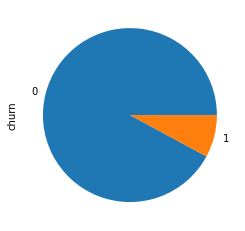

In [40]:
print((tcc_data['churn'].value_counts()/len(tcc_data))*100)
((tcc_data['churn'].value_counts()/len(tcc_data))*100).plot(kind="pie")
plt.show()

### As we can see that 91% of the customers do not churn, there is a possibility of class imbalance

#### Since this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix _9) can be dropped forn the dataset.

In [41]:
# Selecting all the churn phase columns in order to drop then

churn_phase_cols = [col for col in tcc_data.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [42]:
# Dropping the selected churn phase columns
tcc_data.drop(churn_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
tcc_data.shape

(1192, 141)

In [43]:
# tcc_data['total_rech_amt_data_6']=tcc_data['av_rech_amt_data_6'] * tcc_data['total_rech_data_6']
# tcc_data['total_rech_amt_data_7']=tcc_data['av_rech_amt_data_7'] * tcc_data['total_rech_data_7']

# # Calculating the overall recharge amount for the months 6,7,8 and 9
# tcc_data['overall_rech_amt_6'] = tcc_data['total_rech_amt_data_6'] + tcc_data['total_rech_amt_6']
# tcc_data['overall_rech_amt_7'] = tcc_data['total_rech_amt_data_7'] + tcc_data['total_rech_amt_7']

tcc_data.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

#### We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.

#### Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.

In [44]:
# creating a list of column names for each month
mon_6_cols = [col for col in tcc_data.columns if '_6' in col]
mon_7_cols = [col for col in tcc_data.columns if '_7' in col]
mon_8_cols = [col for col in tcc_data.columns if '_8' in col]

In [45]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
tcc_data_corr = tcc_data.corr()
tcc_data_corr.loc[:,:] = np.tril(tcc_data_corr, k=-1)
tcc_data_corr = tcc_data_corr.stack()
tcc_data_corr
tcc_data_corr[(tcc_data_corr > 0.80) | (tcc_data_corr < -0.80)].sort_values(ascending=False)

loc_ic_mou_8        loc_ic_t2m_mou_8      0.934869
total_ic_mou_6      loc_ic_mou_6          0.928817
sachet_2g_8         total_rech_data_8     0.914263
std_ic_mou_7        std_ic_t2m_mou_7      0.911750
loc_ic_mou_6        loc_ic_t2m_mou_6      0.908516
std_ic_mou_8        std_ic_t2m_mou_8      0.907418
loc_ic_mou_7        loc_ic_t2m_mou_7      0.905950
avg_rech_amt_6_7    overall_rech_amt_7    0.902247
total_ic_mou_7      loc_ic_mou_7          0.901720
total_ic_mou_8      loc_ic_mou_8          0.885649
std_ic_mou_6        std_ic_t2m_mou_6      0.885454
std_og_t2f_mou_7    std_og_t2f_mou_6      0.867856
loc_ic_t2m_mou_7    loc_ic_t2m_mou_6      0.866007
total_ic_mou_6      loc_ic_t2m_mou_6      0.845642
loc_og_mou_6        loc_og_t2t_mou_6      0.842548
loc_ic_mou_8        loc_ic_mou_7          0.842230
avg_rech_amt_6_7    overall_rech_amt_6    0.841557
loc_ic_mou_7        loc_ic_mou_6          0.839326
loc_og_mou_8        loc_og_mou_6          0.839275
loc_ic_t2f_mou_8    loc_ic_t2f_

In [46]:
col_to_drop=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
tcc_data.drop(col_to_drop, axis=1, inplace=True)

In [47]:
# The curent dimension of the dataset after dropping few unwanted columns
tcc_data.shape

(1192, 121)

In [48]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
tcc_data['tenure'] = (tcc_data['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
tcc_data.drop('aon',axis=1, inplace=True)

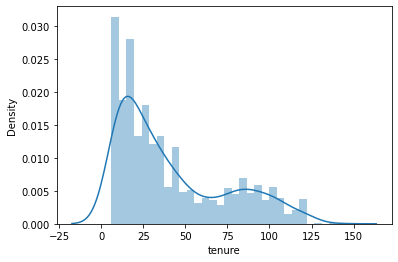

In [49]:
# Checking the distribution of he tenure variable

sns.distplot(tcc_data['tenure'],bins=30)
plt.show()

In [50]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tcc_data['tenure_range'] = pd.cut(tcc_data['tenure'], tn_range, labels=tn_label)
tcc_data['tenure_range'].head()

0     2-5 Yrs    
7     2-5 Yrs    
8     6-12 Months
21    1-2 Yrs    
23    1-2 Yrs    
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

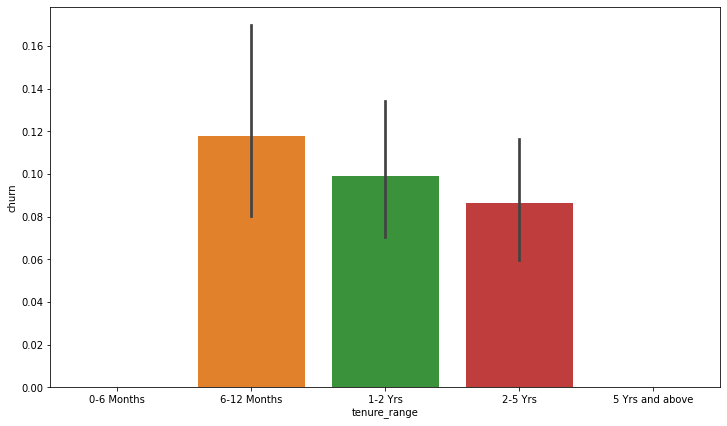

In [51]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=tcc_data)
plt.show()

##### It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two seperate averages, lets take an average to these two and drop the other columns.

In [52]:
tcc_data["avg_arpu_6_7"]= (tcc_data['arpu_6']+tcc_data['arpu_7'])/2
tcc_data['avg_arpu_6_7'].head()

0     206.1005 
7     1209.5150
8     435.4720 
21    556.1030 
23    134.1235 
Name: avg_arpu_6_7, dtype: float64

In [53]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

tcc_data.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
tcc_data.shape

(1192, 121)

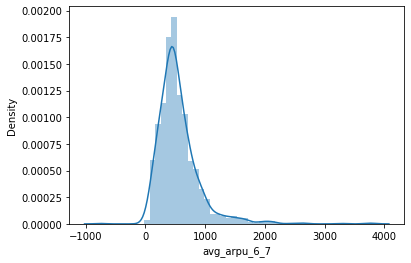

In [54]:
sns.distplot(tcc_data['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

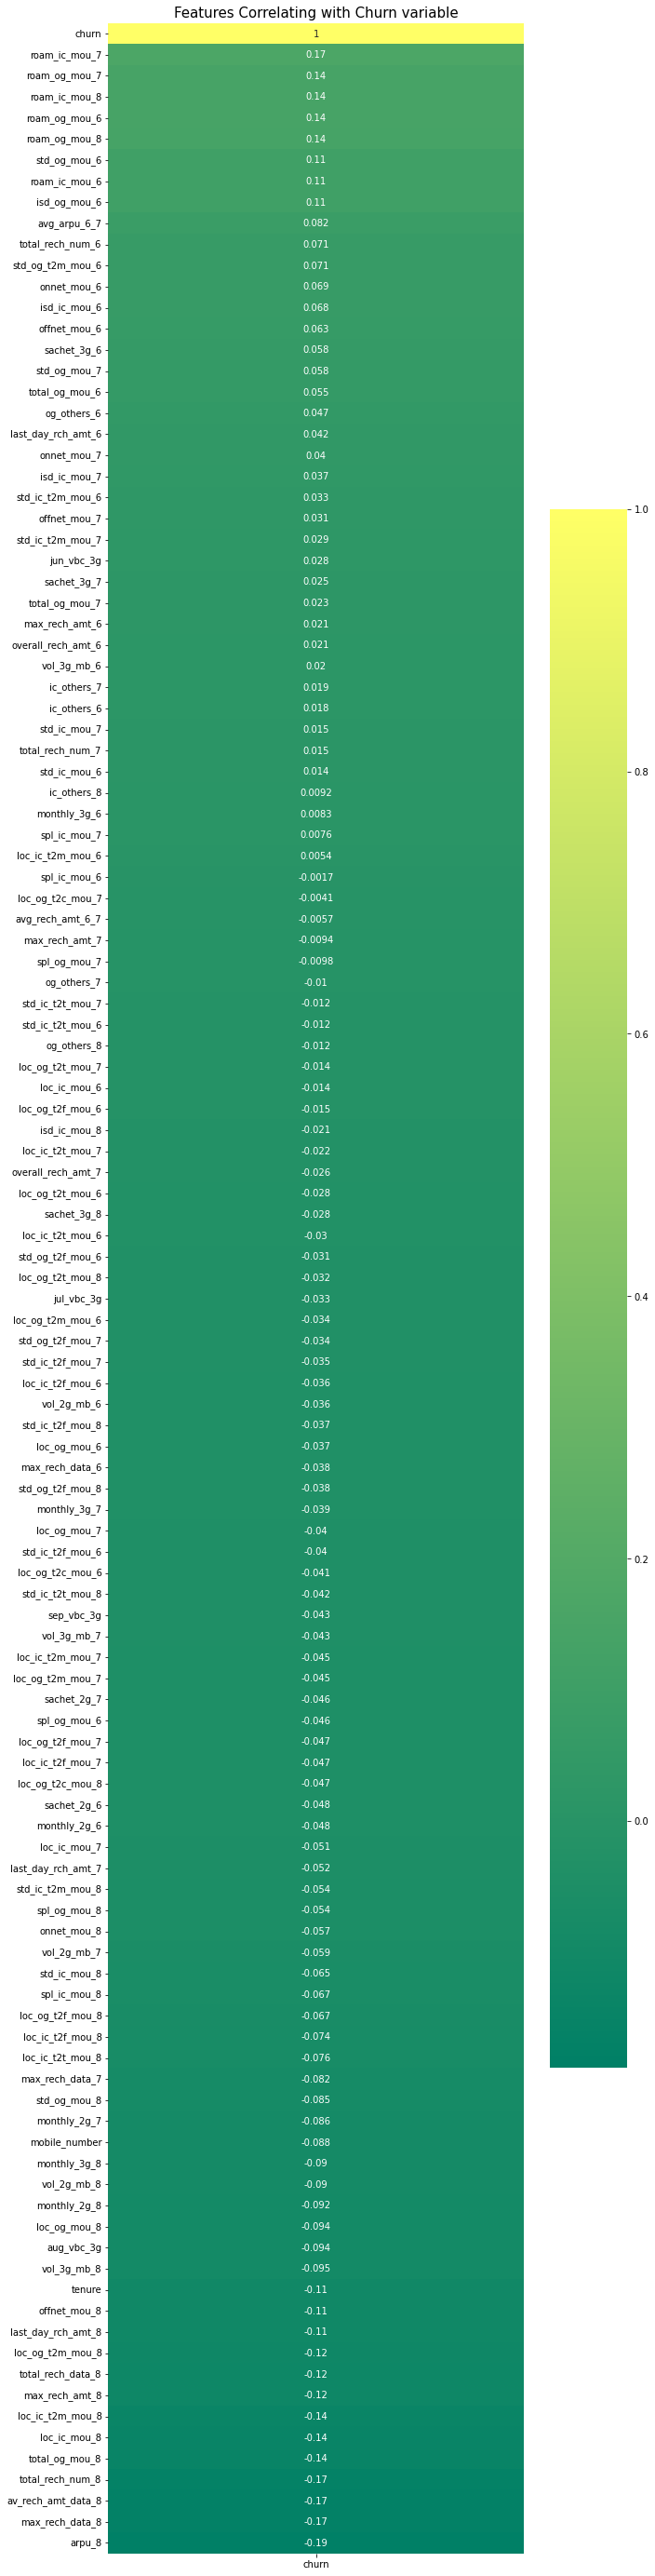

In [55]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(tcc_data.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

##### - Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn.
##### - Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

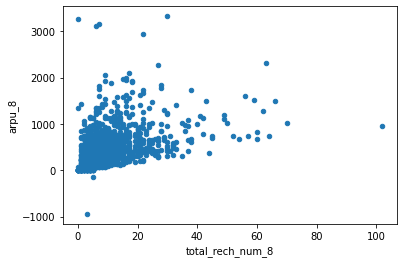

In [56]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
tcc_data[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

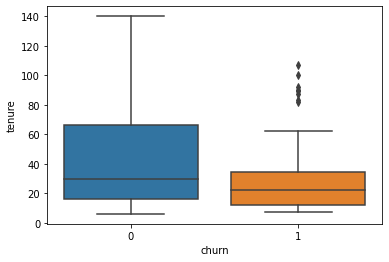

In [57]:
sns.boxplot(x = tcc_data.churn, y = tcc_data.tenure)

plt.show()

#### From the above plot , its clear tenured customers do no churn and they keep availing telecom services

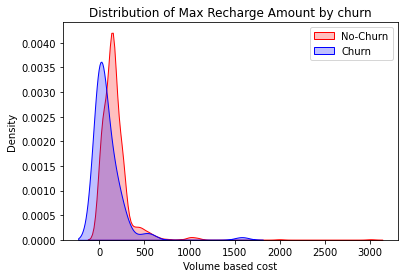

In [58]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(tcc_data.max_rech_amt_8[(tcc_data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(tcc_data.max_rech_amt_8[(tcc_data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

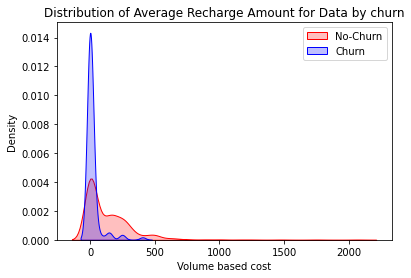

In [59]:
# churn vs max recharge amount
ax = sns.kdeplot(tcc_data.av_rech_amt_data_8[(tcc_data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(tcc_data.av_rech_amt_data_8[(tcc_data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

In [60]:
# Creating categories for month 8 column totalrecharge and their count
tcc_data['total_rech_data_group_8']=pd.cut(tcc_data['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
tcc_data['total_rech_num_group_8']=pd.cut(tcc_data['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 <=10_Recharges     637
No_Recharge        524
10-25_Recharges    29 
>25_Recharges      2  
Name: total_rech_data_group_8, dtype: int64


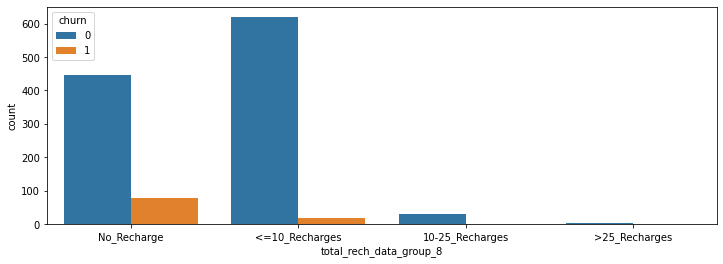

					Distribution of total_rech_num_8 variable
 <=10_Recharges     795
10-25_Recharges    298
>25_Recharges      79 
No_Recharge        20 
Name: total_rech_num_group_8, dtype: int64


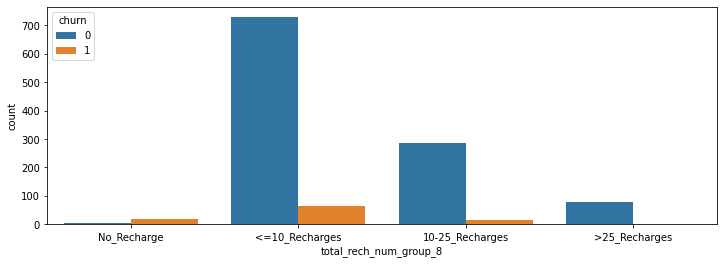

In [61]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=tcc_data,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",tcc_data['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=tcc_data,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",tcc_data['total_rech_num_group_8'].value_counts())
plt.show()

#### As the number of recharge rate increases, the churn rate decreases clearly.

In [62]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(tcc_data[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']], drop_first=True)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,1,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,1,0,1,0,0,0
21,0,0,0,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0


In [63]:
# Adding the results to the master dataframe
tcc_data = pd.concat([tcc_data, dummy], axis=1)
tcc_data.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,tenure,tenure_range,avg_arpu_6_7,total_rech_data_group_8,total_rech_num_group_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,7.000843e+09,213.803,8.006667,28.93,0.00,22.706667,15.356667,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.863333,28.93,0.00,22.366667,12.52,0.00,0.336667,1.08,0.00,0.0,1.753333,0.00,30.573333,42.536667,0.00,0.00,0.00,0.00,0.00,0.143333,0.00,0.00,0.0,0.0,1.753333,0.00,1.053333,0.0,0.0,0.00,0.00,0.00,15.333333,27.573333,0.16,38.31,51.073333,4.13,23.963333,24.83,1.15,77.623333,103.48,5.44,0.00,0.00,0.00,3.703333,0.236667,0.00,0.00,0.026667,0.00,3.703333,0.263333,0.00,0.00,0.0,0.0,1.726667,1.276667,0.00,1.786667,0.00,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1,32.0,2-5 Yrs,206.1005,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,0,0,1,0
7,7.000702e+09,3171.480,57.840000,54.68,52.29,453.430000,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.390000,31.38,40.28,308.630000,447.38,162.28,62.130000,55.14,53.23,0.0,0.000000,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.860000,75.14,77.84,0.0,4.5,0.000000,6.50,0.000000,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.56,221.490000,121.19,152.160000,101.46,39.53,427.880000,355.23,188.04,36.89,11.83,30.39,91.440000,126.990000,141.33,52.19,34.240000,22.21,180.540000,173.080000,193.94,0.21,0.0,0.0,2.060000,14.530000,31.59,15.740000,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1,27.0,2-5 Yrs,1209.5150,No_Recharge,<=10_Recharges,0,0,0,1,0,0,0,0,1,0
8,7.001525e+09,137.362,413.690000,351.03,35.08,94.660000,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.130000,217.59,12.49,80.960000,70.58,50.54,0.000000,0.00,0.00,0.0,0.000000,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26000

In [64]:
# Creating a copy of the filtered dataframe

df=tcc_data[:].copy()

# Dropping unwanted columns
df.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'], axis=1, inplace=True)

In [65]:
df.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,8.006667,28.93,0.00,22.706667,15.356667,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.863333,28.93,0.00,22.366667,12.52,0.00,0.336667,1.08,0.00,0.0,1.753333,0.00,30.573333,42.536667,0.00,0.00,0.00,0.00,0.00,0.143333,0.00,0.00,0.0,0.0,1.753333,0.00,1.053333,0.0,0.0,0.00,0.00,0.00,15.333333,27.573333,0.16,38.31,51.073333,4.13,23.963333,24.83,1.15,77.623333,103.48,5.44,0.00,0.00,0.00,3.703333,0.236667,0.00,0.00,0.026667,0.00,3.703333,0.263333,0.00,0.00,0.0,0.0,1.726667,1.276667,0.00,1.786667,0.00,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,614.0,504.0,559.0,1,206.1005,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.840000,54.68,52.29,453.430000,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.390000,31.38,40.28,308.630000,447.38,162.28,62.130000,55.14,53.23,0.0,0.000000,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.860000,75.14,77.84,0.0,4.5,0.000000,6.50,0.000000,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.56,221.490000,121.19,152.160000,101.46,39.53,427.880000,355.23,188.04,36.89,11.83,30.39,91.440000,126.990000,141.33,52.19,34.240000,22.21,180.540000,173.080000,193.94,0.21,0.0,0.0,2.060000,14.530000,31.59,15.740000,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1,1209.5150,0,0,0,1,0,0,0,0,1,0
8,137.362,413.690000,351.03,35.08,94.660000,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.130000,217.59,12.49,80.960000,70.58,50.54,0.000000,0.00,0.00,0.0,0.000000,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.260000,143.48,98.28,0.0,0.0,0.000000,10.23,0.000000,0.0,0.0,508.36,431.66,171.56,23.840000,9.840000,0.31,57.58,13.980000,15.48,0.000000,0.00,0.00,81.430000,23.83,15.79,0.00,0.58,0.10,22.430000,4.080000,0.65,0.00,0.000000,0.00,22.

In [66]:
# lets create X dataset for model building.
X = df.drop(['churn'],axis=1)

In [67]:
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,8.006667,28.93,0.00,22.706667,15.356667,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.863333,28.93,0.00,22.366667,12.52,0.00,0.336667,1.08,0.00,0.0,1.753333,0.00,30.573333,42.536667,0.00,0.00,0.00,0.00,0.00,0.143333,0.00,0.00,0.0,0.0,1.753333,0.00,1.053333,0.0,0.0,0.00,0.00,0.00,15.333333,27.573333,0.16,38.31,51.073333,4.13,23.963333,24.83,1.15,77.623333,103.48,5.44,0.00,0.00,0.00,3.703333,0.236667,0.00,0.00,0.026667,0.00,3.703333,0.263333,0.00,0.00,0.0,0.0,1.726667,1.276667,0.00,1.786667,0.00,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,614.0,504.0,559.0,206.1005,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.840000,54.68,52.29,453.430000,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.390000,31.38,40.28,308.630000,447.38,162.28,62.130000,55.14,53.23,0.0,0.000000,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.860000,75.14,77.84,0.0,4.5,0.000000,6.50,0.000000,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.56,221.490000,121.19,152.160000,101.46,39.53,427.880000,355.23,188.04,36.89,11.83,30.39,91.440000,126.990000,141.33,52.19,34.240000,22.21,180.540000,173.080000,193.94,0.21,0.0,0.0,2.060000,14.530000,31.59,15.740000,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1209.5150,0,0,0,1,0,0,0,0,1,0
8,137.362,413.690000,351.03,35.08,94.660000,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.130000,217.59,12.49,80.960000,70.58,50.54,0.000000,0.00,0.00,0.0,0.000000,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.260000,143.48,98.28,0.0,0.0,0.000000,10.23,0.000000,0.0,0.0,508.36,431.66,171.56,23.840000,9.840000,0.31,57.58,13.980000,15.48,0.000000,0.00,0.00,81.430000,23.83,15.79,0.00,0.58,0.10,22.430000,4.080000,0.65,0.00,0.000000,0.00,22.430000,4.6

In [68]:
# lets create y dataset for model building.
y=df['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [69]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (834, 126)
Dimension of X_test: (358, 126)


In [70]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 929 to 3559
Data columns (total 126 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    arpu_8                                   float64
 1    onnet_mou_6                              float64
 2    onnet_mou_7                              float64
 3    onnet_mou_8                              float64
 4    offnet_mou_6                             float64
 5    offnet_mou_7                             float64
 6    offnet_mou_8                             float64
 7    roam_ic_mou_6                            float64
 8    roam_ic_mou_7                            float64
 9    roam_ic_mou_8                            float64
 10   roam_og_mou_6                            float64
 11   roam_og_mou_7                            float64
 12   roam_og_mou_8                            float64
 13   loc_og_t2t_mou_6                         float64
 14   loc_o

In [71]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [72]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [73]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
929,0.248076,0.000000,0.000000,0.000074,0.000897,0.000000,0.001980,0.00000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000074,0.001159,0.000000,0.001465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000459,0.000000,0.000673,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000122,0.000000,0.000000,0.000000,0.014071,0.000000,0.0,0.0,0.000457,0.000000,0.001101,0.001080,0.000664,0.000000,0.019691,0.006024,0.008606,0.000000,0.000000,0.000000,0.019209,0.006131,0.008150,0.000000,0.000000,0.000000,0.001543,0.001524,0.007060,0.000000,0.000000,0.000000,0.001245,0.001513,0.007060,0.0,0.0,0.0,0.000000,0.000000,0.000491,0.000959,0.0,0.003620,0.095745,0.054545,0.058824,0.008306,0.006234,0.008306,0.008306,0.006234,0.008306,0.070175,0.038168,0.038168,0.038168,0.057045,0.011552,0.008722,0.008612,0.079466,0.035024,0.012564,0.0,0.0,0.0,0.272727,0.172414,0.0,0.000,0.000000,0.0,0.00,0.000000,0.077931,0.075663,0.104533,0.050519,0.035424,0.020327,0.191436,1,0,0,1,0,0,0,1,0,0
3788,0.258454,0.005912,0.005276,0.006418,0.039984,0.038348,0.015420,0.00000,0.000000,0.0,0.000000,0.00000,0.0,0.005938,0.007556,0.006418,0.050512,0.046343,0.008496,0.001521,0.026007,0.000000,0.015957,0.000000,0.069920,0.023651,0.046958,0.009734,0.000000,0.001939,0.0,0.000000,0.000116,0.000000,0.000000,0.000000,0.015041,0.048981,0.169226,0.000000,0.0,0.0,0.023966,0.029303,0.014257,0.015296,0.009691,0.061695,0.011102,0.015590,0.009500,0.004933,0.004164,0.007200,0.016410,0.020503,0.020137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000572,0.000000,0.000000,0.000000,0.0,0.000000,0.244681,0.163636,0.127451,0.009967,0.007481,0.008306,0.005648,0.002494,0.006645,0.052632,0.038168,0.038168,0.038168,0.042784,0.003940,0.001704,0.000102,0.100717,0.021146,0.013293,0.0,0.0,0.0,0.318182,0.137931,0.0,0.000,0.000000,0.0,0.00,0.037037,0.009771,0.037528,0.090735,0.044570,0.032590,0.015832,0.235375,1,0,0,0,1,0,0,0,1

### Data Imbalance Handling

##### Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

In [74]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [76]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (1546, 126)
Dimension of y_train_sm Shape: (1546,)


### Logistic Regression

In [77]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [78]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 1546
Model:                            GLM   Df Residuals:                     1420
Model Family:                Binomial   Df Model:                          125
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 22 Feb 2023   Deviance:                       3039.4
Time:                        14:39:16   Pearson chi2:                 1.49e+17
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                   -1.225e+15   1.68e+07  -7.31e+07      0.000   -1.23e+15   -1.23e+15
arpu_8                                  -2.199e+15   4.88e+07   -4.5e+07      0.000    -2.2e+15    -2.2e+15
onnet_mou_6                             -1.981e+17   4.65e+09  -4.26e+07      0.000   -1.98e+17   -1.98e+17
onnet_mou_7                              7.881e+16   8.17e+08   9.64e+07      0.000    7.88e+16    7.88e+16
onnet_mou_8                             -6.668e+17   4.41e+09  -1.51e+08      0.000   -6.67e+17   -6.67e+17
offnet_mou_6                            -1.611e+17   3.93e+09   -4.1e+07      0.000   -1.61e+17   -1.61e+17
offnet_mou_7                              1.08e+17   1.16e+09   9.28e+07      0.000    1.08e+17    1.08e+17
offnet_mou_8                            -3.427e+17   2.35e+09  -1.46e+08      0.000   -3.43e+17   -3.43e+17
roam_ic_mou_6                           -2.411e+14   7.25e+07  -3.32e+06      0.000   -2.41e+14   -2.41e+14
roam_ic_mou_7                            4.986e+15   7.18e+07   6.95e+07      0.000    4.99e+15    4.99e+15
roam_ic_mou_8                           -7.787e+14   5.29e+07  -1.47e+07      0.000   -7.79e+14   -7.79e+14
roam_og_mou_6                            6.512e+16   1.53e+09   4.26e+07      0.000    6.51e+16    6.51e+16
roam_og_mou_7                           -3.328e+16   3.85e+08  -8.64e+07      0.000   -3.33e+16   -3.33e+16
roam_og_mou_8                            7.663e+16   5.41e+08   1.42e+08      0.000    7.66e+16    7.66e+16
loc_og_t2t_mou_6                          6.37e+19   2.55e+12   2.49e+07      0.000    6.37e+19    6.37e+19
loc_og_t2t_mou_7                        -5.649e+18   9.41e+11     -6e+06      0.000   -5.65e+18   -5.65e+18
loc_og_t2t_mou_8                         2.684e+20   4.27e+12   6.29e+07      0.000    2.68e+20    2.68e+20
loc_og_t2m_mou_6                         4.173e+19   1.67e+12   2.49e+07      0.000    4.17e+19    4.17e+19
loc_og_t2m_mou_7                        -8.292e+18   1.38e+12  -6.01e+06      0.000   -8.29e+18   -8.29e+18
loc_og_t2m_mou_8                         1.129e+20    1.8e+12   6.29e+07      0.000    1.13e+20    1.13e+20
loc_og_t2f_mou_6                         4.949e+18   1.98e+11   2.49e+07      0.000    4.95e+18    4.95e+18
loc_og_t2f_mou_7                        -5.968e+17   9.94e+10     -6e+06      0.000   -5.97e+17   -5.97e+17
loc_og_t2f_mou_8                         6.733e+18   1.07e+11   6.29e+07      0.000    6.73e+18    6.73e+18
loc_og_t2c_mou_6                        -4.928e+14   6.19e+07  -7.96e+06      0.000   -4.93e+14   -4.93e+14
loc_og_t2c_mou_7                         5.361e+15   1.49e+08   3.61e+07      0.000    5.36e+15    5.36e+15
loc_og_t2c_mou_8                        -2.534e+15   5.07e+

### Logistic Regression using Feature Selection (RFE method)

In [79]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, step = 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [80]:
rfe.support_

array([ True, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
        True,  True,  True, False,  True, False, False,  True,  True,
        True, False, False,  True, False, False, False, False,  True,
        True,  True,  True, False, False,  True, False, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True, False,  True,  True, False, False,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
        True, False, False, False,  True,  True,  True, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True, False,  True,  True,  True, False, False, False, False])

In [81]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'ic_others_6', 'ic_others_7', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'max_rech_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'total_re

In [82]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 3),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 4),
 ('offnet_mou_7', False, 3),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', True, 1),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 3),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', False, 5),
 ('loc_og_t2m_mou_6', False, 4),
 ('loc_og_t2m_mou_7', False, 4),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 4),
 ('loc_og_t2f_mou_7', False, 3),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 3),
 ('loc_og_t2c_mou_7', False, 5),
 ('loc_og_t2c_mou_8', True, 1),
 ('loc_og_mou_6', False, 4),
 ('loc_og_mou_7', False, 5),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2m_mou_6', True, 1),
 ('std_og_t2f_mou_6', True, 1),
 ('std_og_t2f_mou_7', False, 3),
 ('std_og_t2f_mou_8', True, 1),
 ('std_og_mou_6', False, 5),


### Assessing the model with StatsModels

In [83]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 1546
Model:                            GLM   Df Residuals:                     1482
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 22 Feb 2023   Deviance:                       12250.
Time:                        14:39:17   Pearson chi2:                 5.99e+17
No. Iterations:                    33                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    1.082e+15   1.09e+07   9.89e+07      0.000    1.08e+15    1.08e+15
arpu_8                                   7.778e+14   3.64e+07   2.14e+07      0.000    7.78e+14    7.78e+14
onnet_mou_7                              9.524e+14   2.28e+07   4.17e+07      0.000    9.52e+14    9.52e+14
onnet_mou_8                             -2.885e+17   2.46e+09  -1.17e+08      0.000   -2.88e+17   -2.88e+17
offnet_mou_8                            -1.441e+17   1.31e+09   -1.1e+08      0.000   -1.44e+17   -1.44e+17
roam_ic_mou_6                           -2.063e+15   4.78e+07  -4.31e+07      0.000   -2.06e+15   -2.06e+15
roam_ic_mou_7                            4.293e+15    6.6e+07   6.51e+07      0.000    4.29e+15    4.29e+15
roam_ic_mou_8                           -1.133e+15   4.79e+07  -2.37e+07      0.000   -1.13e+15   -1.13e+15
roam_og_mou_6                                1e+14   4.25e+07   2.35e+06      0.000       1e+14       1e+14
roam_og_mou_7                            8.386e+14   6.23e+07   1.35e+07      0.000    8.39e+14    8.39e+14
roam_og_mou_8                            3.303e+16   3.04e+08   1.09e+08      0.000     3.3e+16     3.3e+16
loc_og_t2t_mou_7                         5.382e+14    4.5e+07    1.2e+07      0.000    5.38e+14    5.38e+14
loc_og_t2m_mou_8                         -1.64e+16   7.54e+07  -2.18e+08      0.000   -1.64e+16   -1.64e+16
loc_og_t2f_mou_8                        -2.175e+15    3.7e+07  -5.88e+07      0.000   -2.18e+15   -2.18e+15
loc_og_t2c_mou_8                        -6.485e+14   4.07e+07  -1.59e+07      0.000   -6.49e+14   -6.49e+14
loc_og_mou_8                             3.388e+17   2.52e+09   1.34e+08      0.000    3.39e+17    3.39e+17
std_og_t2m_mou_6                        -5.337e+13   3.17e+07  -1.68e+06      0.000   -5.34e+13   -5.34e+13
std_og_t2f_mou_6                        -2.103e+15   5.93e+07  -3.55e+07      0.000    -2.1e+15    -2.1e+15
std_og_t2f_mou_8                         -2.02e+15   6.36e+07  -3.18e+07      0.000   -2.02e+15   -2.02e+15
std_og_mou_8                             1.348e+17   1.04e+09   1.29e+08      0.000    1.35e+17    1.35e+17
isd_og_mou_6                             4.017e+15   3.23e+07   1.25e+08      0.000    4.02e+15    4.02e+15
spl_og_mou_6                            -3.701e+15   4.03e+07  -9.18e+07      0.000    -3.7e+15    -3.7e+15
og_others_6                                2.2e+15   2.27e+07   9.67e+07      0.000     2.2e+15     2.2e+15
total_og_mou_8                          -4.643e+16   2.82e+08  -1.64e+08      0.000   -4.64e+16   -4.64e+16
loc_ic_t2t_mou_6                        -5.573e+15   5.49e+07  -1.02e+08      0.000   -5.57e+15   -5.57e+15
loc_ic_t2t_mou_7                         3.332e+15   7.77e+

In [84]:
# From the p-value of the individual columns, 
    # we can drop the column 'loc_ic_t2t_mou_8' as it has high p-value of 0.80
rfe_columns_1=rfe_columns.drop('loc_ic_t2t_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)


The new set of edited featured are:
 Index(['arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_7', 'std_ic_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'ic_others_6', 'ic_others_7',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8'

In [85]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 1546
Model:                            GLM   Df Residuals:                     1483
Model Family:                Binomial   Df Model:                           62
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -222.04
Date:                Wed, 22 Feb 2023   Deviance:                       444.08
Time:                        14:39:19   Pearson chi2:                 3.27e+08
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.0416      1.544      0.675      0.500      -1.984       4.068
arpu_8                                     18.5141      5.695      3.251      0.001       7.352      29.676
onnet_mou_7                                 8.8486      2.670      3.315      0.001       3.616      14.081
onnet_mou_8                             -1918.4297    443.516     -4.326      0.000   -2787.706   -1049.154
offnet_mou_8                             -964.9588    233.967     -4.124      0.000   -1423.525    -506.392
roam_ic_mou_6                             -16.5404      5.962     -2.774      0.006     -28.226      -4.855
roam_ic_mou_7                              24.5399     12.464      1.969      0.049       0.111      48.969
roam_ic_mou_8                               6.1931      2.895      2.139      0.032       0.519      11.867
roam_og_mou_6                              11.4650      5.286      2.169      0.030       1.105      21.825
roam_og_mou_7                               4.8850      7.293      0.670      0.503      -9.408      19.179
roam_og_mou_8                             208.3119     53.032      3.928      0.000     104.372     312.252
loc_og_t2t_mou_7                            9.8101      5.103      1.922      0.055      -0.192      19.812
loc_og_t2m_mou_8                          -72.7563     24.324     -2.991      0.003    -120.431     -25.082
loc_og_t2f_mou_8                           -9.5279      7.120     -1.338      0.181     -23.482       4.426
loc_og_t2c_mou_8                           -7.9939      5.141     -1.555      0.120     -18.070       2.082
loc_og_mou_8                             2069.3070    462.306      4.476      0.000    1163.205    2975.409
std_og_t2m_mou_6                           -5.2645      2.501     -2.105      0.035     -10.167      -0.362
std_og_t2f_mou_6                          -59.7773     32.699     -1.828      0.068    -123.865       4.311
std_og_t2f_mou_8                          -27.6520     34.646     -0.798      0.425     -95.557      40.253
std_og_mou_8                              866.5301    190.125      4.558      0.000     493.892    1239.168
isd_og_mou_6                               25.3107      5.531      4.576      0.000      14.470      36.151
spl_og_mou_6                              -20.3296      6.930     -2.934      0.003     -33.912      -6.747
og_others_6                                13.5610      2.579      5.258      0.000       8.506      18.616
total_og_mou_8                           -216.3262     65.972     -3.279      0.001    -345.629     -87.024
loc_ic_t2t_mou_6                          -26.8186      7.996     -3.354      0.001     -42.491     -11.147
loc_ic_t2t_mou_7                           22.9976      8.3

In [86]:
# From the p-value of the individual columns, 
    # we can drop the column 'loc_ic_t2m_mou_8' as it has high p-value of 0.80
rfe_columns_2=rfe_columns_1.drop('loc_ic_t2m_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_2)


The new set of edited featured are:
 Index(['arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_6', 'ic_others_6', 'ic_others_7', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_8',
       'av_rech_amt_data_8', 'vol_2g_mb_7', 'vo

In [87]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 1546
Model:                            GLM   Df Residuals:                     1484
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -227.98
Date:                Wed, 22 Feb 2023   Deviance:                       455.95
Time:                        14:39:20   Pearson chi2:                 3.11e+09
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.5759      1.554      0.371      0.711      -2.471       3.622
arpu_8                                     20.6600      5.833      3.542      0.000       9.228      32.092
onnet_mou_7                                 7.9495      2.586      3.074      0.002       2.881      13.018
onnet_mou_8                             -1815.2031    422.043     -4.301      0.000   -2642.392    -988.014
offnet_mou_8                             -912.5337    223.265     -4.087      0.000   -1350.126    -474.942
roam_ic_mou_6                             -14.8193      5.419     -2.735      0.006     -25.440      -4.198
roam_ic_mou_7                              23.1050     11.818      1.955      0.051      -0.058      46.268
roam_ic_mou_8                               6.4948      2.864      2.268      0.023       0.881      12.108
roam_og_mou_6                              11.3104      4.866      2.324      0.020       1.774      20.847
roam_og_mou_7                               3.4749      7.217      0.482      0.630     -10.670      17.619
roam_og_mou_8                             195.8737     50.346      3.891      0.000      97.198     294.549
loc_og_t2t_mou_7                           13.8223      5.077      2.722      0.006       3.871      23.774
loc_og_t2m_mou_8                          -76.8581     22.341     -3.440      0.001    -120.646     -33.070
loc_og_t2f_mou_8                          -18.2458      9.594     -1.902      0.057     -37.049       0.558
loc_og_t2c_mou_8                           -9.6505      5.018     -1.923      0.054     -19.485       0.184
loc_og_mou_8                             1959.3530    433.983      4.515      0.000    1108.762    2809.944
std_og_t2m_mou_6                           -6.2177      2.447     -2.541      0.011     -11.014      -1.421
std_og_t2f_mou_6                          -47.1928     31.143     -1.515      0.130    -108.232      13.846
std_og_t2f_mou_8                          -29.6009     34.706     -0.853      0.394     -97.624      38.422
std_og_mou_8                              822.2119    180.408      4.558      0.000     468.618    1175.806
isd_og_mou_6                               26.5258      5.782      4.587      0.000      15.192      37.859
spl_og_mou_6                              -20.3140      6.777     -2.998      0.003     -33.596      -7.032
og_others_6                                13.4589      2.606      5.165      0.000       8.352      18.566
total_og_mou_8                           -209.9324     65.401     -3.210      0.001    -338.116     -81.749
loc_ic_t2t_mou_6                          -16.9588      6.429     -2.638      0.008     -29.559      -4.358
loc_ic_t2t_mou_7                           26.5549      7.1

In [88]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([3.47364407e-02, 8.22705110e-06, 7.70747875e-07, 2.94664623e-08,
       3.64169543e-05, 2.69247474e-06, 1.19815171e-06, 1.47173266e-01,
       7.55163347e-01, 2.51790955e-01])

### Creating a dataframe with the actual churn flag and the predicted probabilities

In [89]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,3.473644e-02
1,0,8.227051e-06
2,0,7.707479e-07
3,0,2.946646e-08
4,0,3.641695e-05


### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [90]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,3.473644e-02,0
1,0,8.227051e-06,0
2,0,7.707479e-07,0
3,0,2.946646e-08,0
4,0,3.641695e-05,0


In [91]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[722  51]
 [ 17 756]]


In [92]:
# Predicted     not_churn    churn
# Actual
# not_churn        15661      3627
# churn            2775       16513

In [93]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.9560155239327296


In [94]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,std_ic_t2m_mou_6,2.669251e+09
26,loc_ic_mou_6,1.458663e+09
36,isd_ic_mou_6,5.495404e+08
33,std_ic_mou_7,3.141098e+08
25,loc_ic_t2f_mou_8,2.372009e+08
30,std_ic_t2m_mou_7,1.034717e+08
27,loc_ic_mou_8,4.547833e+07
34,std_ic_mou_8,7.502163e+06
18,std_og_mou_8,4.237880e+03
3,offnet_mou_8,4.126690e+03


### Metrics beyond simply accuracy

In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.9780077619663649
Specificity =  0.9340232858990944
False Positive Rate =  0.06597671410090557
Precision =  0.9368029739776952
True Negative Prediction Rate =  0.9769959404600812


### Plotting the ROC Curve

In [98]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [99]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

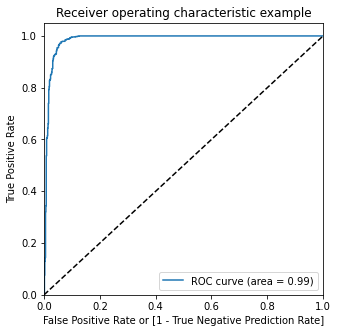

In [100]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

In [101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,3.473644e-02,0,1,0,0,0,0,0,0,0,0,0
1,0,8.227051e-06,0,1,0,0,0,0,0,0,0,0,0
2,0,7.707479e-07,0,1,0,0,0,0,0,0,0,0,0
3,0,2.946646e-08,0,1,0,0,0,0,0,0,0,0,0
4,0,3.641695e-05,0,1,0,0,0,0,0,0,0,0,0


In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.500000  1.000000     0.000000   
0.1  0.1          0.916559  1.000000     0.833118   
0.2  0.2          0.935964  1.000000     0.871928   
0.3  0.3          0.948254  0.996119     0.900388   
0.4  0.4          0.953428  0.987063     0.919793   
0.5  0.5          0.956016  0.978008     0.934023   
0.6  0.6          0.954722  0.961190     0.948254   
0.7  0.7          0.943726  0.928849     0.958603   
0.8  0.8          0.922380  0.873221     0.971539   
0.9  0.9          0.873868  0.764554     0.983182   


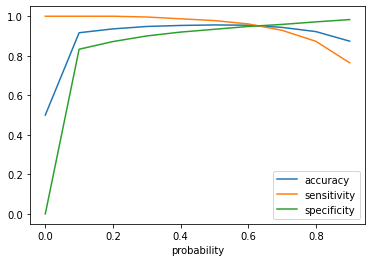

In [103]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### Initially we selected the optimm point of classification as 0.5.

#### From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.

In [104]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,3.473644e-02,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,8.227051e-06,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,7.707479e-07,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2.946646e-08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,3.641695e-05,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50  0.50         0.956016  0.978008     0.934023   
0.51  0.51         0.957309  0.978008     0.936611   
0.52  0.52         0.957956  0.978008     0.937904   
0.53  0.53         0.957956  0.978008     0.937904   
0.54  0.54         0.956016  0.972833     0.939198   
0.55  0.55         0.956662  0.971539     0.941785   
0.56  0.56         0.956662  0.968952     0.944373   
0.57  0.57         0.956016  0.966365     0.945666   
0.58  0.58         0.955369  0.963777     0.946960   
0.59  0.59         0.956016  0.963777     0.948254   


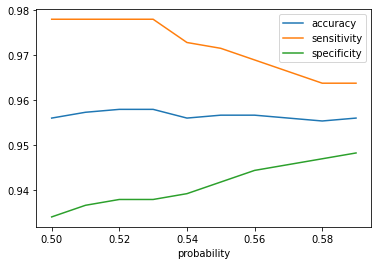

In [106]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.54

In [107]:
# From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,3.473644e-02,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,8.227051e-06,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,7.707479e-07,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2.946646e-08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,3.641695e-05,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [108]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.9560155239327296


In [109]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[726  47]
 [ 21 752]]


In [110]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.9728331177231565
Specificity =  0.9391979301423027
False Positive Rate =  0.06080206985769728
Precision =  0.9411764705882353
True Negative Prediction Rate =  0.9718875502008032


### Precision and recall tradeoff

In [111]:
from sklearn.metrics import precision_recall_curve

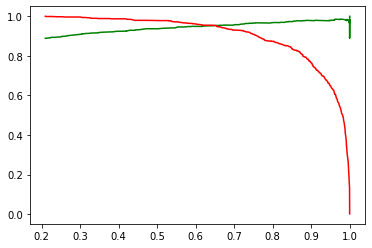

In [112]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

#### Transforming and feature selection for test data

In [113]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
193,0.349120,0.000232,0.032210,0.007661,0.000342,0.020461,0.015582,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000233,0.046135,0.007661,0.000442,0.015385,0.012478,0.000000,0.006986,0.000000,0.0,0.053578,0.212471,0.000316,0.041659,0.012576,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.002356,0.000000,0.002456,0.118307,0.075396,0.0,0.0,0.0,0.000368,0.030178,0.015565,0.024382,0.020230,0.094197,0.007170,0.009439,0.023442,0.000000,0.000000,0.000000,0.014831,0.018349,0.037398,0.000000,0.000000,0.000000,0.000236,0.000216,0.001929,0.00000,0.0,0.0,0.000190,0.000215,0.001929,0.0,0.0,0.0,0.000000,0.000000,0.001175,0.0,0.007014,0.000000,0.042553,0.272727,0.294118,0.003322,0.007481,0.009967,0.003322,0.007481,0.009967,0.228070,0.000000,0.038168,0.038168,0.065031,0.000000,0.182128,0.154607,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.344828,0.0,0.000,0.000000,0.000000,0.10,0.000000,0.000000,0.000000,0.000000,0.000472,0.177310,0.067314,0.213565,0,1,0,0,0,1,0,0,1,0
2572,0.224359,0.000000,0.000000,0.002747,0.000015,0.001795,0.004544,0.0,0.000000,0.103111,0.0,0.000000,0.034305,0.000000,0.000000,0.000047,0.000000,0.002514,0.002366,0.000000,0.000000,0.000000,0.0,0.000000,0.000999,0.000000,0.002212,0.001016,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.010453,0.000351,0.000270,0.000000,0.0,0.0,0.0,0.000238,0.002714,0.000000,0.000612,0.000000,0.007772,0.000890,0.002354,0.012216,0.000000,0.000000,0.001181,0.001052,0.002276,0.013018,0.000854,0.000000,0.000064,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000659,0.000000,0.000032,0.0,0.0,0.0,0.017348,0.033256,0.000000,0.0,0.273717,0.000000,0.117021,0.172727,0.009804,0.009967,0.027431,0.000000,0.005648,0.007481,0.000000,0.000000,0.038168,0.038168,0.000000,0.000000,0.105557,0.201016,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.409091,0.482759,0.0,0.000,0.000000,0.000000,0.05,0.000000,0.000000,0.000000,0.000000,0.087347,0.230021,0.138762,0.224908,0,0,0,1,0,0,1,0,0,0
1623,0.224359,0.000000,0.000143,0.003342,0.00

In [114]:
# Feature selection
X_test=X_test[rfe_columns_2]
X_test.head()

,arpu_8,onnet_mou_7,onnet_mou_8,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_6,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,monthly_2g_8,monthly_3g_8,sachet_3g_6,aug_vbc_3g,jun_vbc_3g,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges
193,0.349120,0.032210,0.007661,0.015582,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.046135,0.012478,0.000000,0.212471,0.012576,0.000000,0.0,0.0,0.002356,0.000000,0.002456,0.0,0.015565,0.024382,0.020230,0.000000,0.014831,0.037398,0.000000,0.000236,0.000216,0.001929,0.0,0.000215,0.001929,0.0,0.000000,0.0,0.007014,0.042553,0.272727,0.294118,0.003322,0.007481,0.009967,0.228070,0.065031,0.182128,0.154607,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.213565,0,1,0,0,1
2572,0.224359,0.000000,0.002747,0.004544,0.0,0.000000,0.103111,0.0,0.000000,0.034305,0.000000,0.002366,0.000000,0.000999,0.001016,0.000000,0.0,0.0,0.000000,0.010453,0.000351,0.0,0.000000,0.000612,0.000000,0.001181,0.001052,0.013018,0.000064,0.000000,0.000000,0.000000,0.0,0.000000,0.000032,0.0,0.017348,0.0,0.273717,0.117021,0.172727,0.009804,0.009967,0.007481,0.000000,0.000000,0.000000,0.201016,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.224908,0,0,1,0,0
1623,0.224359,0.000143,0.003342,0.009950,0.0,0.001895,0.116639,0.0,0.002625,0.038131,0.000205,0.008502,0.000000,0.000999,0.003883,0.000000,0.0,0.0,0.000150,0.000000,0.000000,0.0,0.000000,0.001021,0.000132,0.004905,0.001256,0.029261,0.000360,0.000000,0.000000,0.001421,0.0,0.000000,0.001603,0.0,0.000000,0.0,0.000000,0.212766,0.081818,0.049020,0.008306,0.012469,0.000000,0.000000,0.000000,0.080904,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200562,0,0,1,0,0
3356,0.345587,0.000000,0.000006,0.000129,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000053,0.001779,0.000000,0.000072,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000073,0.016988,0.012110,0.005712,0.015670,0.020796,0.000000,0.000327,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000572,0.0,0.000000,0.021277,0.072727,0.049020,0.051163,0.062843,0.051163,0.052632,0.261266,0.000000,0.058324,0.083706,0.2,0.000000,0.000000,0.000000,0.000000,0.270913,1,0,1,0,0
3415,0.679733,0.489632,0.215590,0.144652,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.191384,0.125538,0.271791,0.000000,0.089564,0.016833,0.0,0.0,0.456189,0.000000,0.983292,0.0,0.285205,0.149625,0.188519,0.164024,0.379867,0.313167,0.024262,0.018168,0.023751,0.014551,0.0,0.034779,0.026833,0.0,0.000000,0.0,0.000000,0.191489,0.163636,0.176471,0.083721,0.000000,0.043189,0.105263,0.344552,0.005392,0.002473,0.485000,0.0,0.285714,0.076923,0.153889,0.333914,0.542011,1,0,0,1,0


In [115]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

#### Predicting the target variable

In [116]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 193     8.739838e-38
2572    5.234513e-02
1623    2.993576e-02
3356    6.648010e-03
3415    1.351138e-27
1781    6.362950e-03
1081    3.511513e-05
3782    2.608745e-02
1875    4.497874e-08
922     2.079467e-04
dtype: float64


In [117]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
193,8.739838e-38
2572,5.234513e-02
1623,2.993576e-02
3356,6.648010e-03
3415,1.351138e-27


In [118]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [119]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
193,0
2572,1
1623,0
3356,0
3415,0


In [120]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
193,0,8.739838e-38
2572,1,5.234513e-02
1623,0,2.993576e-02
3356,0,6.648010e-03
3415,0,1.351138e-27


In [121]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
193,0,8.739838e-38,0
2572,1,5.234513e-02,0
1623,0,2.993576e-02,0
3356,0,6.648010e-03,0
3415,0,1.351138e-27,0


In [122]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8966480446927374

#### Metrics Evaluation

In [123]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[304  21]
 [ 16  17]]


In [124]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.5151515151515151
Specificity =  0.9353846153846154
False Positive Rate =  0.06461538461538462
Precision =  0.4473684210526316
True Negative Prediction Rate =  0.95


### Explaining the results

In [126]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  90.0 %
The sensitivity of the predicted model is:  52.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



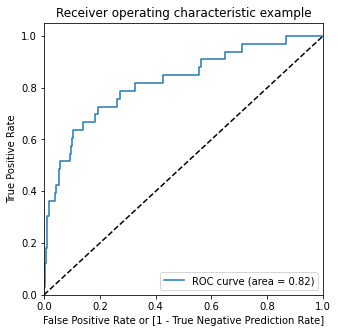

In [127]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

#### The AUC score for train dataset is 0.90 and the test dataset is 0.87.
#### This model can be considered as a good model.

### Logistic Regression using PCA

In [128]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (834, 126)
Dimension of X_test: (358, 126)
Dimension of X_train_sm Shape: (1546, 126)
Dimension of y_train_sm Shape: (1546,)


,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,0.248076,0.000000,0.000000,0.000074,0.000897,0.000000,0.001980,0.00000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000074,0.001159,0.000000,0.001465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000459,0.000000,0.000673,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000122,0.000000,0.000000,0.000000,0.014071,0.000000,0.0,0.0,0.000457,0.000000,0.001101,0.001080,0.000664,0.000000,0.019691,0.006024,0.008606,0.000000,0.000000,0.000000,0.019209,0.006131,0.008150,0.000000,0.000000,0.000000,0.001543,0.001524,0.007060,0.000000,0.000000,0.000000,0.001245,0.001513,0.007060,0.0,0.0,0.0,0.000000,0.000000,0.000491,0.000959,0.0,0.003620,0.095745,0.054545,0.058824,0.008306,0.006234,0.008306,0.008306,0.006234,0.008306,0.070175,0.038168,0.038168,0.038168,0.057045,0.011552,0.008722,0.008612,0.079466,0.035024,0.012564,0.0,0.0,0.0,0.272727,0.172414,0.0,0.000,0.000000,0.0,0.00,0.000000,0.077931,0.075663,0.104533,0.050519,0.035424,0.020327,0.191436,1,0,0,1,0,0,0,1,0,0
1,0.258454,0.005912,0.005276,0.006418,0.039984,0.038348,0.015420,0.00000,0.000000,0.0,0.000000,0.00000,0.0,0.005938,0.007556,0.006418,0.050512,0.046343,0.008496,0.001521,0.026007,0.000000,0.015957,0.000000,0.069920,0.023651,0.046958,0.009734,0.000000,0.001939,0.0,0.000000,0.000116,0.000000,0.000000,0.000000,0.015041,0.048981,0.169226,0.000000,0.0,0.0,0.023966,0.029303,0.014257,0.015296,0.009691,0.061695,0.011102,0.015590,0.009500,0.004933,0.004164,0.007200,0.016410,0.020503,0.020137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000572,0.000000,0.000000,0.000000,0.0,0.000000,0.244681,0.163636,0.127451,0.009967,0.007481,0.008306,0.005648,0.002494,0.006645,0.052632,0.038168,0.038168,0.038168,0.042784,0.003940,0.001704,0.000102,0.100717,0.021146,0.013293,0.0,0.0,0.0,0.318182,0.137931,0.0,0.000,0.000000,0.0,0.00,0.037037,0.009771,0.037528,0.090735,0.044570,0.032590,0.015832,0.235375,1,0,0,0,1,0,0,0,1,0
2,

In [129]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [130]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (1546, 126)
Dimension of X_test_pca:  (358, 126)


In [131]:
#Viewing the PCA components
pca.components_

array([[ 5.50086509e-02, -1.45886952e-02, -7.59547923e-03, ...,
        -9.51537347e-03,  3.47362070e-01, -9.50281514e-04],
       [-8.52590369e-03,  2.40413828e-02,  2.42168738e-02, ...,
         5.29353386e-01, -6.96934015e-01, -1.47351516e-03],
       [ 3.28091768e-02, -2.73448884e-02, -5.56703480e-02, ...,
         3.29268646e-01, -1.68172092e-01,  4.12549694e-03],
       ...,
       [ 1.79256577e-07,  3.51271491e-05,  6.65298356e-06, ...,
         8.85794227e-08,  6.02569428e-08, -3.37728390e-07],
       [-1.90806805e-07,  4.17418099e-06,  2.52086340e-06, ...,
         3.51149839e-08,  3.33657929e-08,  3.17464593e-07],
       [-0.00000000e+00, -2.92417264e-14,  1.69052424e-15, ...,
         3.43233411e-17, -5.95031454e-18, -3.94386768e-16]])

### Performing Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (358, 1)


In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[274  51]
 [  8  25]] 

Accuracy of the logistic regression model with PCA:  0.835195530726257


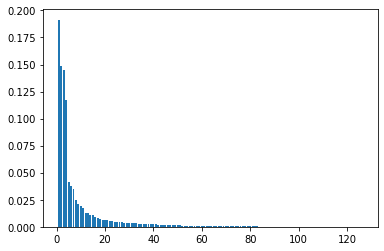

In [134]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

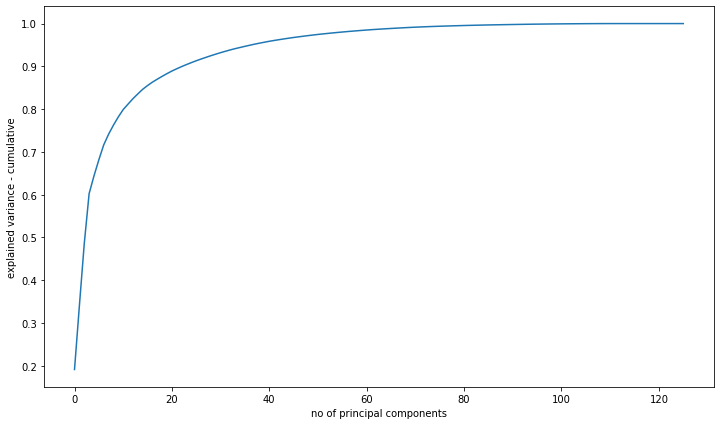

In [135]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()


In [136]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([19.1, 34. , 48.5, 60.2, 64.3, 68.1, 71.6, 74.1, 76.2, 78.1, 79.8,
       81.1, 82.4, 83.5, 84.6, 85.5, 86.3, 87. , 87.7, 88.3, 88.9, 89.4,
       89.9, 90.4, 90.9, 91.3, 91.7, 92.1, 92.5, 92.9, 93.3, 93.6, 93.9,
       94.2, 94.5, 94.8, 95.1, 95.4, 95.6, 95.8, 96. , 96.2, 96.4, 96.6,
       96.8, 97. , 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. ,
       98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1,
       99.2, 99.3, 99.4, 99.5, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6])

###### 
*90% of the data can be explained with 8 PCA components

#### Fitting the dataset with the 8 explainable components

In [137]:
pca_8 = PCA(n_components=15)

train_pca_8 = pca_8.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_8.shape)

test_pca_8 = pca_8.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_8.shape)

Dimension for Train dataset using PCA:  (1546, 15)
Dimension for Test dataset using PCA:  (358, 15)


In [138]:
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_sm)

# making the predictions
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# converting the prediction into a dataframe
y_pred_df_8 = pd.DataFrame(y_pred_8)
print("Dimension of y_pred_df_8: ", y_pred_df_8.shape)

Dimension of y_pred_df_8:  (358, 1)


In [139]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_8),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_8))

Confusion Matirx for y_test & y_pred
 [[256  69]
 [  9  24]] 

Accuracy of the logistic regression model with PCA:  0.7821229050279329


**Business Insights**

Business Insights
Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.

The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.

To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.
 